In [ ]:
#loading libraries
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import patsy
import scipy.stats as stats
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error



In [163]:
#code retreived from: https://github.com/ajeya-bhat/Data-Analytics/blob/master/code/Neural_Network.py
#This function automatically preprocess the data, preparing it for the model training 
def preprocessing(data):

    
    removing_list = list(range(56,70))+list(range(77,106)) #list unwanted features from the data
    data.drop(data.columns[removing_list], axis = 1, inplace = True) #Removing the unwanted features.
    data.drop(['sofifa_id','short_name','nationality','player_url','dob','real_face','player_traits',
                'long_name','club_name','league_name','player_tags','body_type','wage_eur','team_jersey_number',
                'loaned_from','joined','contract_valid_until','nation_position','nation_jersey_number',
                'attacking_heading_accuracy','attacking_short_passing','work_rate','attacking_volleys','skill_fk_accuracy'
                ,'skill_curve','weak_foot','team_position', 'release_clause_eur'],inplace = True,axis = 1) 
    data[data['value_eur'] >= 0]
    data['player_positions'] = data['player_positions'].map(lambda x: x.split(',')[0] if ',' in x else x)
    data['player_positions'] = data['player_positions'].map(combined_position)
    data.fillna(0)

    data = pd.get_dummies(data, columns=['player_positions','preferred_foot'])
    return data


In [165]:
data_21 = pd.read_csv('players_21.csv')
df = data_21
df1 = preprocessing(df)
X = df1.drop('value_eur',axis = 1)
y = df1.value_eur
X = pd.DataFrame(df2).fillna(0)

In [ ]:
#code retreived from: https://github.com/tanpengshi/Metis_Project_2_FIFA_Players/blob/master/Scripts%20and%20Data/Regression_Fifa_Market_Final_v2.ipynb
corr_matrix = data_21.corr()
corr_matrix


In [ ]:
#code retreived from: https://github.com/tanpengshi/Metis_Project_2_FIFA_Players/blob/master/Scripts%20and%20Data/Regression_Fifa_Market_Final_v2.ipynb
corr_matrix = df.corr()
fig = plt.figure(figsize=[10,8])
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,cmap='seismic',linewidth=1,linecolor='white',vmax = 1, vmin=-1,mask=mask, annot=True,fmt='0.2f')
plt.title('Correlation Heatmap', weight='bold',fontsize=20)
plt.savefig('heatmap2.png',transparent=True, bbox_inches='tight')

In [166]:
y_mean , y_std = y.mean() , y.std()
Y_norm=( y - y.mean())/ y.std()
Y = Y_norm
print( y_mean )
print( y_std ) 
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform( Y )

2224813.2918074327
5102485.993624738


In [167]:
#Splitting into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
print(X_test.shape,X_train.shape)
print(y_test.shape,y_train.shape)

(3789, 38) (15155, 38)
(3789,) (15155,)


In [168]:
#Applying Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.8945396475617003
RMSE : 9.754369083983038


iter 0 	accuracy 0.9133079275031696 	test 0.9167230761390064 	loss 39.40901556208038
iter 50 	accuracy 0.8978149675889634 	test 0.9032917663746437 	loss 57.06728681563164
iter 100 	accuracy 0.9496399662678968 	test 0.9511386110216191 	loss 52.22108827064915
iter 150 	accuracy 0.9596440188290328 	test 0.960876119831018 	loss 36.05841783045105
iter 200 	accuracy 0.9615425381179754 	test 0.9613258425075274 	loss 33.09937421434324
iter 250 	accuracy 0.9626749466333033 	test 0.962875818093103 	loss 30.07872910746654
iter 300 	accuracy 0.961818562992029 	test 0.9619239264290232 	loss 27.09351055464653
iter 350 	accuracy 0.9672051965329433 	test 0.9669137669539405 	loss 24.409877112221185
iter 400 	accuracy 0.9697083230501117 	test 0.9695440893053244 	loss 21.24920875178121
iter 450 	accuracy 0.9703648230277891 	test 0.9697669373617953 	loss 22.498120148537076
iter 500 	accuracy 0.9713157305203242 	test 0.970627456259424 	loss 20.992741963073062
iter 550 	accuracy 0.9770519811903565 	test 0.9

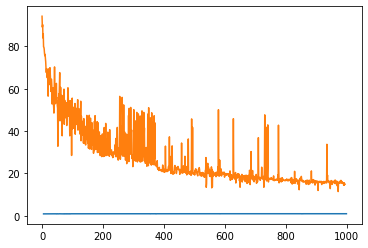

In [ ]:
#Code retrieved from: https://github.com/tanpengshi/Metis_Project_2_FIFA_Players/blob/master/Scripts%20and%20Data/Regression_Fifa_Market_Final_v2.ipynb
# Final model reaching best accuracy metrics
from sklearn.neural_network import MLPRegressor

clf = MLPRegressor(hidden_layer_sizes=(40,100,60), learning_rate_init=0.001, random_state=1, max_iter=1000)
licz=[]
accu=[]
loss=[]
test=[]
for i in range(1000):
    clf.fit(X_train, y_train)
    licz.append(i)
    accu.append(clf.score(X_train, y_train))
    loss.append(clf.loss_)
    test.append(clf.score(X=X_test, y=y_test))
    if i%50==0: 
        print("iter",i,"\taccuracy",clf.score(X_train, y_train),"\ttest",clf.score(X=X_test, y=y_test),"\tloss",clf.loss_)
import matplotlib.pyplot as plt
print(clf.score(X=X_test, y=y_test))
plt.plot(licz[5:],accu[5:], loss[5:])

iter 0 	accuracy 0.90242346322455 	test 0.917942222366402 	loss 47.99686977937419
iter 50 	accuracy 0.9037804079322262 	test 0.9216493780138957 	loss 52.44399587902268
iter 100 	accuracy 0.9210315669022573 	test 0.9333672897659625 	loss 53.110233146144274
iter 150 	accuracy 0.9493225033338982 	test 0.9535393351172579 	loss 48.114378222765446
iter 200 	accuracy 0.9101111785702081 	test 0.9338222076363067 	loss 54.972785144850185
iter 250 	accuracy 0.9723935205968183 	test 0.9698377283973623 	loss 20.513201903828026
iter 300 	accuracy 0.9726230260187304 	test 0.9707021412501835 	loss 22.96623069388525
iter 350 	accuracy 0.9708165489339216 	test 0.9678590044938381 	loss 18.5264924641209
iter 400 	accuracy 0.9734733860114341 	test 0.9706396992027894 	loss 16.575944137850303
iter 450 	accuracy 0.9730580972514661 	test 0.9700358628140789 	loss 22.739847585825895
iter 500 	accuracy 0.9761254052990048 	test 0.9736981432274024 	loss 22.9887130700546
iter 550 	accuracy 0.9782395309782105 	test 0

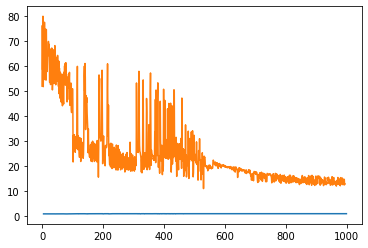

In [ ]:
clf = MLPRegressor(hidden_layer_sizes=(40,100), learning_rate_init=0.003, random_state=1, max_iter=1000, warm_start=True)
licz=[]
accu=[]
loss=[]
test=[]
for i in range(1000):
    clf.fit(X_train, y_train)
    licz.append(i)
    accu.append(clf.score(X_train, y_train))
    loss.append(clf.loss_)
    test.append(clf.score(X=X_test, y=y_test))
    if i%50==0: 
        print("iter",i,"\taccuracy",clf.score(X_train, y_train),"\ttest",clf.score(X=X_test, y=y_test),"\tloss",clf.loss_)
import matplotlib.pyplot as plt
print(clf.score(X=X_test, y=y_test))
plt.plot(licz[5:],accu[5:], loss[5:])

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred, squared=False)
#str(np.sqrt(mean_squared_error(y_test, predictions)))

20.470464008316316

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred)

3.276340724636786

In [ ]:
pred = clf.predict(X_test) 

In [ ]:
r2_score(y_test, pred)

0.9786624158871682

iter 0 	accuracy 0.9006367657309248 	test 0.9236944958988229 	loss 50.881500491377466
iter 50 	accuracy 0.8932399958018274 	test 0.9155663684005443 	loss 78.38324912799158
iter 100 	accuracy 0.8954883332586037 	test 0.9148018432785805 	loss 65.49597669457944
iter 150 	accuracy 0.9096982597710802 	test 0.9318187272844373 	loss 62.877859846590304
iter 200 	accuracy 0.9623076242279732 	test 0.9619657960521439 	loss 33.13994483013771
iter 250 	accuracy 0.9628832867016254 	test 0.9625317476609652 	loss 22.92099125528529
iter 300 	accuracy 0.967181505467103 	test 0.9664657438755014 	loss 28.547936204567694
iter 350 	accuracy 0.97039814924084 	test 0.9688993668916782 	loss 17.506448256814075
iter 400 	accuracy 0.9743758011029491 	test 0.9728423987543214 	loss 19.797104697110026
iter 450 	accuracy 0.9741357745135191 	test 0.9728155069137049 	loss 23.176196451299383
iter 500 	accuracy 0.9758138299724903 	test 0.9746540582856362 	loss 20.653124850399625
iter 550 	accuracy 0.9757822947046042 	tes

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


iter 850 	accuracy 0.958854714355526 	test 0.9649852807900016 	loss 30.61430434662114
iter 900 	accuracy 0.9802941398983258 	test 0.9788313418815943 	loss 16.072874255078876
iter 950 	accuracy 0.9806270009751887 	test 0.9792087187788201 	loss 15.392912516202353
0.9800606864604501


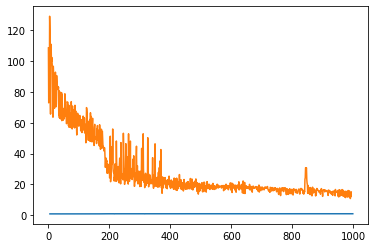

In [ ]:
clf = MLPRegressor(hidden_layer_sizes=(40, 100, 100, 60), learning_rate_init=0.003, random_state=1, max_iter=1000, warm_start=True)
licz=[]
accu=[]
loss=[]
test=[]
for i in range(1000):
    clf.fit(X_train, y_train)
    licz.append(i)
    accu.append(clf.score(X_train, y_train))
    loss.append(clf.loss_)
    test.append(clf.score(X=X_test, y=y_test))
    if i%50==0: 
        print("iter",i,"\taccuracy",clf.score(X_train, y_train),"\ttest",clf.score(X=X_test, y=y_test),"\tloss",clf.loss_)
import matplotlib.pyplot as plt
print(clf.score(X=X_test, y=y_test))
plt.plot(licz[5:],accu[5:], loss[5:])

In [ ]:
def print_accuracy(f):
    print("Root mean squared test error = {0}".format(np.sqrt(np.mean((f(X_test) - y_test)**2))))
    time.sleep(0.5) # to let the print get out before any progress bars

In [ ]:
print_accuracy(clf.predict)

Root mean squared test error = 4.3788123704306425


In [ ]:
!pip install shap

     |████████████████████████████████| 358kB 24.2MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491631 sha256=d720c6feb5537debd2f4bbb9acf9c8ec9a2468ca7b4d89c1b4198e43240fcc49
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [ ]:
import shap

In [ ]:
# Code retrieved from https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Diabetes%20regression.html
X_train_summary = shap.kmeans(X_train, 10)

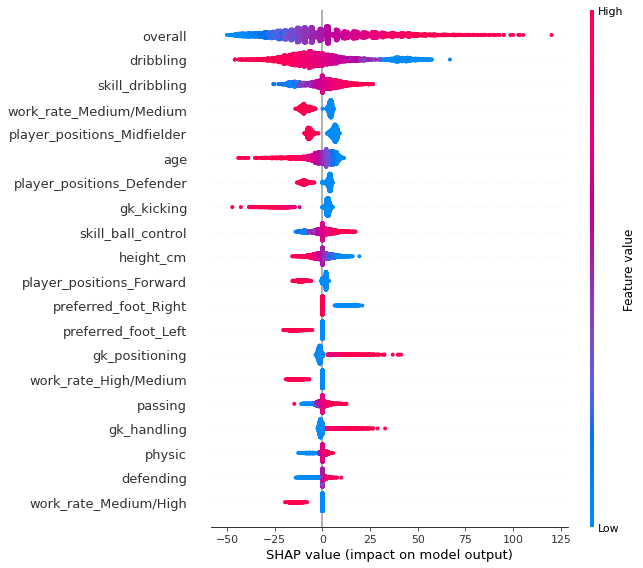

In [ ]:
# Code retrieved from https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Diabetes%20regression.html
explainer = shap.KernelExplainer(clf.predict, X_train_summary)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

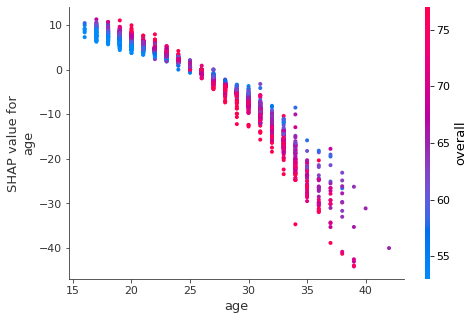

In [ ]:
# Code retrieved from https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Diabetes%20regression.html
shap.dependence_plot("age", shap_values, X_test)

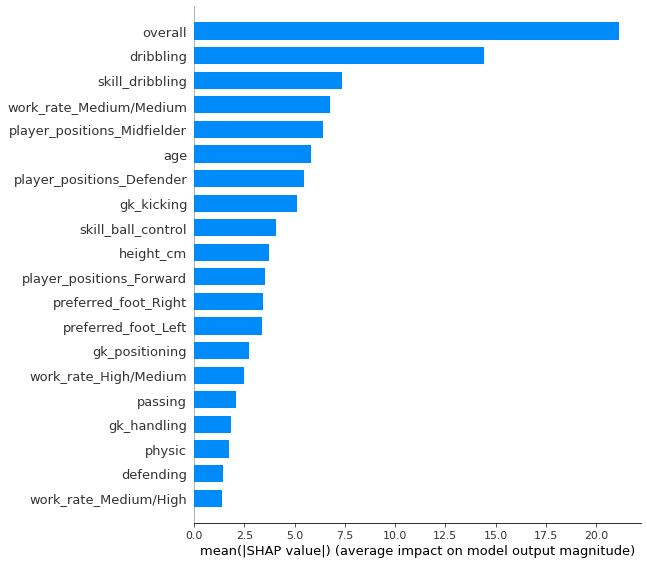

In [ ]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

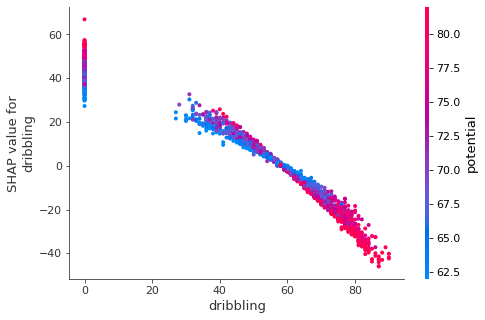

In [ ]:
shap.dependence_plot("dribbling", shap_values, X_test)